In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df=df[['Age','EstimatedSalary','Purchased']]

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [8]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled.shape

(400, 2)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [14]:
X_train.shape

(320, 2)

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [20]:
model=Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)


Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9121 - loss: 0.2829 - val_accuracy: 0.9750 - val_loss: 0.1533
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8977 - loss: 0.2716 - val_accuracy: 0.9875 - val_loss: 0.1513
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8997 - loss: 0.2877 - val_accuracy: 0.9750 - val_loss: 0.1523
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8898 - loss: 0.2924 - val_accuracy: 0.9750 - val_loss: 0.1543
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9221 - loss: 0.2433 - val_accuracy: 0.9750 - val_loss: 0.1565
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9021 - loss: 0.2706 - val_accuracy: 0.9750 - val_loss: 0.1517
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9067 - loss: 0.2365 - val_accuracy: 0.9750 - val_loss: 0.1560
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8667 - loss: 0.3424 - val_accu

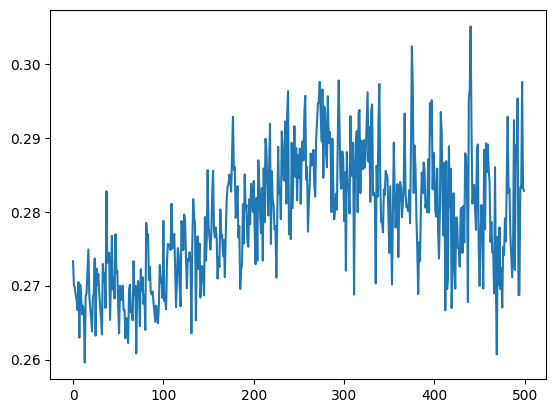

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])


In [30]:
model=Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.2463 - loss: 0.7353 - val_accuracy: 0.6000 - val_loss: 0.6906
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3110 - loss: 0.7162 - val_accuracy: 0.6750 - val_loss: 0.6898
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3404 - loss: 0.7071 - val_accuracy: 0.5375 - val_loss: 0.6910
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4168 - loss: 0.7010 - val_accuracy: 0.5375 - val_loss: 0.6910
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5233 - loss: 0.6951 - val_accuracy: 0.5250 - val_loss: 0.6914
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5740 - loss: 0.6899 - val_accuracy: 0.5000 - val_loss: 0.6922
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6357 - loss: 0.6853 - val_accuracy: 0.4875 - val_loss: 0.6923
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6865 - loss: 0.6809 - val_accuracy: 0.5000 - val_loss: 0.6920

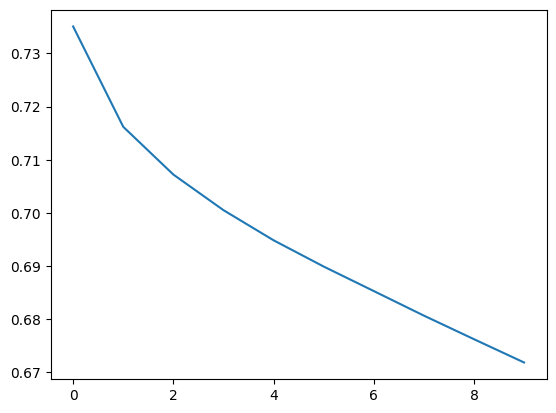

In [32]:
plt.plot(history.history['loss'])